In [35]:
%matplotlib inline

import powerlaw
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

plt.style.use(["seaborn-whitegrid"])
plt.rcParams["figure.figsize"] = (10, 5)

In [36]:
def fully_connected_network(m):
    graph = nx.Graph()
    graph.add_nodes_from(range(m))
    while 0 in list(graph.degree().values()):
        edge = np.random.choice(range(m), 2)
        if edge[0] != edge[1]:
            graph.add_edge(edge[0], edge[1])
    return graph

In [37]:
def barabasi_albert(n, m):
    i = m
    values = {}
    clustng_coeff = []
    graph = fully_connected_network(m)
    while i <= n:
        degrees = np.array(list(graph.degree().values()))
        weights = degrees/sum(degrees)
        node = np.random.choice(graph.nodes(), p=weights)
        graph.add_edge(i, node) 
        clustng_coeff.append(((np.log(i))**2)/i)
        if i+1 in [100, 1000, 10000]:
            values[i+1] = list(graph.degree().values())
        i = i + 1
    return graph, values, clustng_coeff

In [38]:
def log_binning_plot(ax, values, color):
    kmin = min(values)
    kmax = max(values)    
    bin_edges = np.logspace(np.log10(kmin), np.log10(kmax), num=10)    
    density, _ = np.histogram(values, bins=bin_edges, density=True)    
    log_be = np.log10(bin_edges)
    x = 10**((log_be[1:] + log_be[:-1])/2)
    ax.loglog(x, density, marker="o", linestyle="none", color=color)
    return ax

In [39]:
def distribution(data):
    degrees = {}
    for n in data:
        if n not in degrees:
            degrees[n] = 0
        degrees[n] += 1
    return sorted(degrees.items())

In [40]:
m = 4
n = 10**4
G, values, clustng_coeff = barabasi_albert(n, m)

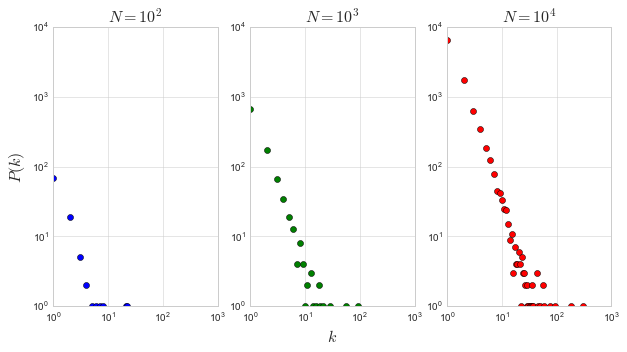

In [41]:
fig = plt.figure()
ax1 = fig.add_subplot(131)
plt.ylabel(r"$P(k)$", fontsize=16)
plt.title(r"$N=10^2$", fontsize=16)
ax2 = fig.add_subplot(132, sharey=ax1, sharex=ax1)
plt.xlabel(r"$k$", fontsize=16)
plt.title(r"$N=10^3$", fontsize=16)
ax3 = fig.add_subplot(133, sharey=ax1, sharex=ax1)
plt.title(r"$N=10^4$", fontsize=16)

data = distribution(values[100])
ax1.loglog([k for (k ,v) in data], [v for (k, v) in data], "bo")
data = distribution(values[1000])
ax2.loglog([k for (k ,v) in data], [v for (k, v) in data], "go")
data = distribution(values[10000])
ax3.loglog([k for (k ,v) in data], [v for (k, v) in data], "ro")

plt.show()

C:\Anaconda3\lib\site-packages\powerlaw.py:692: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
C:\Anaconda3\lib\site-packages\powerlaw.py:692: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


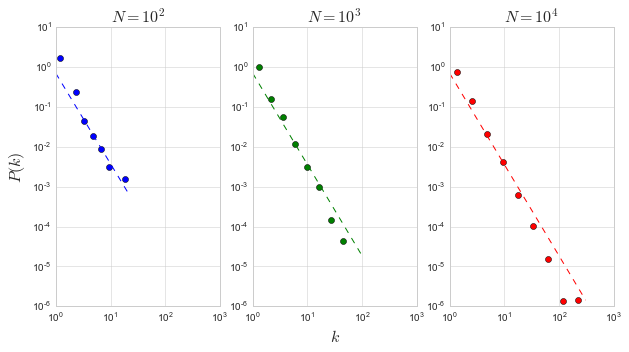

In [42]:
data = list(values[100])
fitted = powerlaw.Fit(data, xmin=min(data), xmax=max(data), discrete=True)
fig = plt.figure()
ax1 = fig.add_subplot(131)
plt.ylabel(r"$P(k)$", fontsize=16)
plt.title(r"$N=10^2$", fontsize=16)
ax1 = log_binning_plot(ax1, data, "b")
fitted.power_law.plot_pdf(color="b", linestyle="--", ax=ax1)

data = list(values[1000])
fitted = powerlaw.Fit(data, xmin=min(data), xmax=max(data), discrete=True)
ax2 = fig.add_subplot(132, sharex=ax1, sharey=ax1)
plt.title(r"$N=10^3$", fontsize=16)
plt.xlabel(r"$k$", fontsize=16)
ax2 = log_binning_plot(ax2, data, "g")
fitted.power_law.plot_pdf(color="g", linestyle="--", ax=ax2)

data = list(values[10000])
fitted = powerlaw.Fit(data, xmin=min(data), xmax=max(data), discrete=True)
ax3 = fig.add_subplot(133, sharex=ax1, sharey=ax1)
plt.title(r"$N=10^4$", fontsize=16)
ax3 = log_binning_plot(ax3, data, "r")
fitted.power_law.plot_pdf(color="r", linestyle="--", ax=ax3)

plt.show()

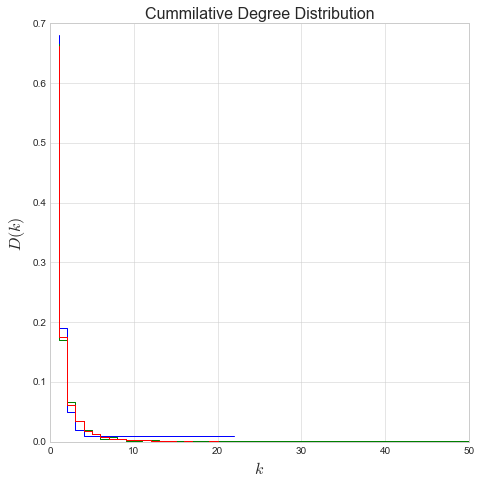

In [43]:
fig = plt.figure(figsize=(7.5,7.5))
plt.title(r"Cummilative Degree Distribution", fontsize=16)
plt.xlabel(r"$k$", fontsize=16)
plt.ylabel(r"$D(k)$", fontsize=16)
plt.xlim([0,50])

data = distribution(values[100])
plt.step([d[0] for d in data], [d[1]/100 for d in data], "b")
data = distribution(values[1000])
plt.step([d[0] for d in data], [d[1]/1000 for d in data], "g")
data = distribution(values[10000])
plt.step([d[0] for d in data], [d[1]/10000 for d in data], "r");

C:\Anaconda3\lib\site-packages\powerlaw.py:692: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
C:\Anaconda3\lib\site-packages\powerlaw.py:692: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


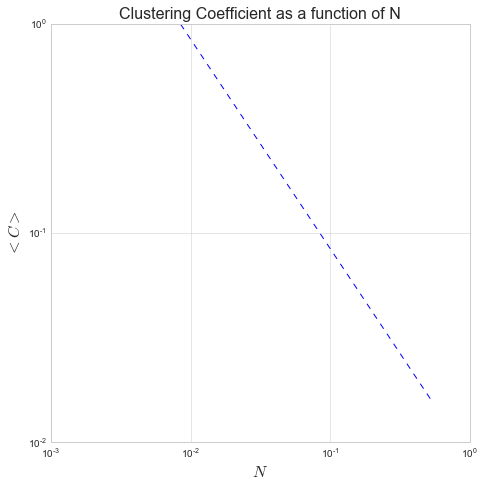

In [44]:
data = clustng_coeff
fitted = powerlaw.Fit(data, xmin=min(data), xmax=max(data), discrete=True)
fig = plt.figure(figsize=(7.5,7.5))
ax = fig.add_subplot(111)
plt.ylabel(r"$<C>$", fontsize=16)
plt.xlabel(r"$N$", fontsize=16)
plt.title(r"Clustering Coefficient as a function of N", fontsize=16)
fitted.power_law.plot_pdf(color="b", linestyle="--", ax=ax);

In [45]:
graph = nx.read_gml("./netscience/netscience.gml")

giant = max(nx.connected_component_subgraphs(graph), key=len)
nx.write_gexf(giant, "giant_component.gexf")